In [51]:
from array import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def IntCode(puzzleInput, counter = 0, relativeValue = 0):
    x = puzzleInput.copy()
    while counter < len(x):
        operatorLength = len(str(x[counter]))
        if x[counter] == 99:
            return
        operator = str(x[counter])[-1]
        try:
            modeOneOperator = str(x[counter])[-3]
            if modeOneOperator == '0':
                modeOne = 'position'
            elif modeOneOperator == '1':
                modeOne = 'immediate'
            elif modeOneOperator == '2':
                modeOne = 'relative'
        except:
            modeOne = 'position'
            pass
        try: 
            modeTwoOperator = str(x[counter])[-4]
            if modeTwoOperator == '0':
                modeTwo = 'position'
            elif modeTwoOperator == '1':
                modeTwo = 'immediate'
            elif modeTwoOperator == '2':
                modeTwo = 'relative'
        except:
            modeTwo = 'position'
            pass
        try:
            modeThreeOperator = str(x[counter])[-5]
            if modeThreeOperator == '0':
                modeThree = 'position'
            elif modeThreeOperator == '1':
                modeThree = 'immediate'
            elif modeThreeOperator == '2':
                modeThree = 'relative'
        except:
            modeThree = 'position'
            pass
        if modeOne == 'position':
            try:
                inputOne = x[x[counter+1]]
            except:
                inputOne = 0
                pass
        elif modeOne == 'immediate':
            try:
                inputOne = x[counter+1]
            except:
                inputOne = 0
                pass
        elif modeOne == 'relative':
            try:
                inputOne = x[relativeValue + x[counter+1]]
            except:
                print('Threw exception ' + str(relativeValue + x[counter+1]))
                inputOne = 0
                pass
        if modeTwo == 'position':
            try:
                inputTwo = x[x[counter+2]]
            except:
                inputTwo = 0
                pass
        elif modeTwo == 'immediate':
            try:
                inputTwo = x[counter+2]
            except:
                inputTwo = 0
                pass
        elif modeTwo == 'relative':
            try:
                inputTwo = x[relativeValue + x[counter+2]]
            except:
                inputTwo = 0
                pass
        if operator == '1':
            output = inputOne + inputTwo
            if modeThree != 'relative':
                inputThree = x[counter+3]
            else:
                inputThree = relativeValue + x[counter+3]
            try:
                x[inputThree] = output
            except:
                for extending in range(len(x),inputThree+1):
                    x[extending:] = [0]
                x[inputThree] = output
                pass
            counter = counter + 4
        elif operator == '2':
            output = inputOne * inputTwo
            if modeThree != 'relative':
                inputThree = x[counter+3]
            else:
                inputThree = relativeValue + x[counter+3]
            try:
                x[inputThree] = output
            except:
                for extending in range(len(x),inputThree+1):
                    x[extending:] = [0]
                x[inputThree] = output
                pass
            counter = counter + 4
        elif operator == '3':
            #output = int(input('Enter Input: '))
            output = shipGrid[robotPosition[0]][robotPosition[1]]
            if modeOne != 'relative':
                inputOne = x[counter+1]
            else:
                inputOne = relativeValue + x[counter+1]
            try:
                x[inputOne] = output
            except:
                for extending in range(len(x),inputOne+1):
                    x[extending:] = [0]
                x[inputOne] = output
                pass
            counter = counter + 2
        elif operator == '4':
            output = inputOne
            counter = counter + 2
            return x,output, counter, relativeValue
        elif operator == '5':
            if inputOne == 0:
                counter = counter + 3
            else:
                counter = inputTwo
        elif operator == '6':
            if inputOne == 0:
                counter = inputTwo
            else:
                counter = counter + 3
        elif operator == '7':
            if modeThree != 'relative':
                inputThree = x[counter+3]
            else:
                inputThree = relativeValue + x[counter+3]
            if inputOne < inputTwo:
                try:
                    x[inputThree] = 1
                except:
                    for extending in range(len(x),inputThree+1):
                        x[extending:] = [0]
                    x[inputThree] = 1
                    pass
            else:
                try:
                    x[inputThree] = 0
                except:
                    for extending in range(len(x),inputThree+1):
                        x[extending:] = [0]
                    x[inputThree] = 0
                    pass
            counter = counter + 4
        elif operator == '8':
            if modeThree != 'relative':
                inputThree = x[counter+3]
            else:
                inputThree = relativeValue + x[counter+3]
            if inputOne == inputTwo:
                try:
                    x[inputThree] = 1
                except:
                    for extending in range(len(x),inputThree+1):
                        x[extending:] = [0]
                    x[inputThree] = 1
                    pass
            else:
                try:
                    x[inputThree] = 0
                except:
                    for extending in range(len(x),inputThree+1):
                        x[extending:] = [0]
                    x[inputThree] = 0
                    pass
            counter = counter + 4
        elif operator == '9':
            relativeValue = relativeValue + inputOne
            counter = counter + 2

In [45]:
counterValue = 0
relativeValueValue = 0
direction = 'north'
robotPosition = [50,50]
codes = [3,8,1005,8,350,1106,0,11,0,0,0,104,1,104,0,3,8,1002,8,-1,10,101,1,10,10,4,10,1008,8,1,10,4,10,102,1,8,29,1006,0,82,1006,0,40,3,8,1002,8,-1,10,101,1,10,10,4,10,1008,8,0,10,4,10,1002,8,1,57,1,102,15,10,1,1005,14,10,1006,0,33,3,8,102,-1,8,10,101,1,10,10,4,10,1008,8,0,10,4,10,102,1,8,90,1,1008,14,10,2,3,19,10,1006,0,35,1006,0,21,3,8,102,-1,8,10,1001,10,1,10,4,10,108,1,8,10,4,10,1002,8,1,125,1,1105,11,10,2,1105,9,10,1,4,1,10,2,1,4,10,3,8,1002,8,-1,10,101,1,10,10,4,10,1008,8,0,10,4,10,101,0,8,164,1006,0,71,3,8,102,-1,8,10,101,1,10,10,4,10,1008,8,0,10,4,10,1002,8,1,189,1006,0,2,1,5,17,10,1006,0,76,1,1002,7,10,3,8,1002,8,-1,10,101,1,10,10,4,10,108,1,8,10,4,10,1001,8,0,224,1,3,5,10,3,8,1002,8,-1,10,101,1,10,10,4,10,108,1,8,10,4,10,101,0,8,250,1,1,20,10,1,102,13,10,2,101,18,10,3,8,1002,8,-1,10,101,1,10,10,4,10,108,0,8,10,4,10,102,1,8,284,2,105,0,10,1,105,20,10,3,8,1002,8,-1,10,101,1,10,10,4,10,1008,8,1,10,4,10,1002,8,1,315,1006,0,88,1,2,4,10,2,8,17,10,2,6,2,10,101,1,9,9,1007,9,1056,10,1005,10,15,99,109,672,104,0,104,1,21102,1,847069688728,1,21101,0,367,0,1106,0,471,21102,386577216404,1,1,21102,378,1,0,1105,1,471,3,10,104,0,104,1,3,10,104,0,104,0,3,10,104,0,104,1,3,10,104,0,104,1,3,10,104,0,104,0,3,10,104,0,104,1,21101,97952923867,0,1,21102,425,1,0,1106,0,471,21101,0,29033143319,1,21102,436,1,0,1105,1,471,3,10,104,0,104,0,3,10,104,0,104,0,21102,1,868410614628,1,21101,0,459,0,1105,1,471,21101,837896909672,0,1,21101,0,470,0,1105,1,471,99,109,2,22102,1,-1,1,21101,40,0,2,21102,502,1,3,21102,492,1,0,1106,0,535,109,-2,2105,1,0,0,1,0,0,1,109,2,3,10,204,-1,1001,497,498,513,4,0,1001,497,1,497,108,4,497,10,1006,10,529,1102,1,0,497,109,-2,2105,1,0,0,109,4,2101,0,-1,534,1207,-3,0,10,1006,10,552,21101,0,0,-3,22101,0,-3,1,22101,0,-2,2,21102,1,1,3,21101,571,0,0,1106,0,576,109,-4,2106,0,0,109,5,1207,-3,1,10,1006,10,599,2207,-4,-2,10,1006,10,599,21202,-4,1,-4,1105,1,667,21202,-4,1,1,21201,-3,-1,2,21202,-2,2,3,21102,1,618,0,1106,0,576,21201,1,0,-4,21101,0,1,-1,2207,-4,-2,10,1006,10,637,21102,0,1,-1,22202,-2,-1,-2,2107,0,-3,10,1006,10,659,21202,-1,1,1,21101,659,0,0,106,0,534,21202,-2,-1,-2,22201,-4,-2,-4,109,-5,2105,1,0]

In [46]:
shipGrid = np.zeros((100,100))
shipGrid[50][50] = 1
paintedGrids = 0
try:
    del paintedGridPositions[:]
except:
    pass
paintedGridPositions = []
while counterValue < len(codes):
    codes,output,counterValue,relativeValueValue = IntCode(codes,counterValue,relativeValueValue)
    shipGrid[robotPosition[0],robotPosition[1]] = output
    if robotPosition not in paintedGridPositions:
        paintedGridPositions.append([robotPosition[0],robotPosition[1]])
        paintedGrids = paintedGrids + 1
    codes,output,counterValue,relativeValueValue = IntCode(codes,counterValue,relativeValueValue)
    if direction == 'north':
        if output == 0:
            direction = 'east'
            robotPosition[0] = robotPosition[0]-1
        else:
            direction = 'west'
            robotPosition[0] = robotPosition[0]+1
    elif direction == 'east':
        if output == 0:
            direction = 'south'
            robotPosition[1] = robotPosition[1]-1
        else:
            direction = 'north'
            robotPosition[1] = robotPosition[1]+1
    elif direction == 'south':
        if output == 0:
            direction = 'west'
            robotPosition[0] = robotPosition[0]+1
        else:
            direction = 'east'
            robotPosition[0] = robotPosition[0]-1
    else:
        if output == 0:
            direction = 'north'
            robotPosition[1] = robotPosition[1]+1
        else:
            direction = 'south'
            robotPosition[1] = robotPosition[1]-1
    

TypeError: cannot unpack non-iterable NoneType object

In [47]:
len(paintedGridPositions)

249

In [48]:
paintedGrids

249

In [49]:
shipGrid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

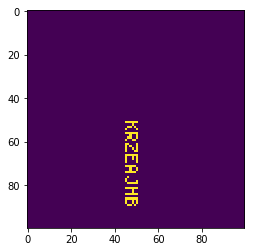

In [52]:
plt.imshow(shipGrid,interpolation='nearest')
plt.show()